<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [106]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы обеспечить одинаковый процесс выполнения функций и методов, зависящих от случайного числа.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [107]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [108]:
df_train_init = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test_init = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [109]:
#Исходная ячейка кода. Была с самого начала. Оставлена без изменений
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0

In [110]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [111]:
#Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
print("Колонки с пропусками")
for col in df_train.columns:
    train_miss = df_train[col].isnull().sum()
    test_miss = df_test[col].isnull().sum()
    if train_miss > 0 or test_miss > 0:
        print(f"\nКолонка {col}\nПропуски: train - {train_miss}, test - {test_miss}")

#Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
print(f"Полные дубликаты в train: {df_train.duplicated().sum()}")
print(f"Полные дубликаты в test: {df_test.duplicated().sum()}")


#Постройте дашборд в одну строку, используя ydata-profilling(0.15 балла)
#Строю дашборд по общему df(train+test)
dashboard = ProfileReport(df_train)
dashboard.to_file("report.html")

Колонки с пропусками

Колонка mileage
Пропуски: train - 202, test - 19

Колонка engine
Пропуски: train - 202, test - 19

Колонка max_power
Пропуски: train - 196, test - 19

Колонка torque
Пропуски: train - 203, test - 19

Колонка seats
Пропуски: train - 202, test - 19
Полные дубликаты в train: 985
Полные дубликаты в test: 62


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 18.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).**
*Алгоритм поиска дубликатов в YData Profiling Report посчитал меньшее количество дубликатов*

*Высокая корреляция в парах:*
km_driven-selling_price
km_driven-year

*Можно обработать признаки, содержащие строковые значения*

Из признака torgue:
Максимальный крутящий момент
Обороты максимального крутящего момента

Из признака engine:
Объем двигателя

Из признака mileage:
Расход топлива

*Большинство данных имеют значение Individual в признаке seller_type*

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [112]:
#Посчитайте основные статистики по числовым столбцам для трейна и теста
print('Статистика по числовым столбцам')
print("train:")
print(df_train.describe())
print("test :")
print(df_test.describe())

#Посчитайте основные статистики по категориальным столбцам для трейна и теста
print('\nСтатистика по категориальным столбцам')
print("train:")
print(df_train.describe(include=['object']))
print("test :")
print(df_test.describe(include=['object']))

#Сравните среднее и медиану внутри train, внутри test и между собой. О чём могут говорить результаты?
print("\nСравнение средних и медиан по количественным столбцам")
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\nПризнак - {col}")
    train_mean = df_train[col].mean()
    train_median = df_train[col].median()
    test_mean = df_test[col].mean()
    test_median = df_test[col].median()

    print(f"  train: Среднее - {train_mean}, Медиана - {train_median}, разница - {abs(train_mean-train_median)}")
    print(f"  test: Среднее - {test_mean}, Медиана - {test_median}, разница - {abs(train_mean-train_median)}")

Статистика по числовым столбцам
train:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
test :
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   615

# **Сравните среднее и медиану внутри train, внутри test и между собой. О чём могут говорить результаты?**
Разница между средним значением и медианой в признаках year и seats небольшое. Данные признаки распределены симметрично, возможно, даже не имеют аномалий.

Высокая разница в признаках selling_price и km_driven. Распределены они не симметрично, возможно, есть аномалии в данных. Больше дешевых автомобилей, больше автомобилей с высоким пробегом.

# **Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.**
Признаки selling_price и km_driven имеют значения на порядок выше. Возможно, потребуется их нормализация.

Статистика на train и test имеют близкие значения по большинству признаков, что благоприятно для моделирования и валидации, однако:

km_driven: Максимум 2.36 млн км в train и 375 тыс км в test. Возможно аномалии

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [113]:
#Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
features_drop_target = df_train.columns.drop('selling_price')
duplicates = df_train[df_train.duplicated(subset=features_drop_target, keep=False)]
print(f"Объектов с одинаковым признаковым описанием: {len(duplicates)}")
#Отобразите такие объекты
print("\nДублирующиеся объекты:")
print(duplicates)
#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
print(f"\nРазмер датасета до удаления дублей: {df_train.shape}")
df_train = df_train.drop_duplicates(subset=features_drop_target, keep='first')
print(f"Размер датасета после удаления дублей: {df_train.shape}")
#Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train = df_train.reset_index(drop=True)

Объектов с одинаковым признаковым описанием: 1799

Дублирующиеся объекты:
                                          name  year  selling_price  km_driven    fuel seller_type transmission         owner     mileage   engine max_power               torque  seats
22                     Maruti Baleno Delta 1.2  2016         575000      45000  Petrol  Individual       Manual   First Owner   21.4 kmpl  1197 CC      83.1       115Nm@ 4000rpm    5.0
26                 Maruti Omni E MPI STD BS IV  2018         254999      25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   796 CC      34.2        59Nm@ 2500rpm    8.0
27             Maruti Vitara Brezza LDi Option  2017         670000      70000  Diesel  Individual       Manual   First Owner   24.3 kmpl  1248 CC      88.5       200Nm@ 1750rpm    5.0
28                          Fiat Palio 1.2 ELX  2003          70000      50000  Petrol  Individual       Manual  Second Owner         NaN      NaN       NaN                  NaN    NaN
2

# **Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать.**
В датасете много признаков имеют текстовые значения в формате строки.
В данных могут быть дубликаты, которые не были замечены, из-за опечаток или иного форматирования. Необходимо привести значения текстовых признаков к единому формату, а также искать похожие, а не идентичные значения строк.

Также есть признаки, описывающие технические характеристики в формате [{значение} {единица измерения}]. Необходимо привести эти признаки к численному типу значений с едиными единицами измерений.

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [114]:
#Уберите единицы измерения для признаков mileage, engine, max_power.
#Приведите тип данных к float.
for feature in ['mileage', 'engine', 'max_power']:
    df_train[feature] = df_train[feature].astype(str)
    df_test[feature] = df_test[feature].astype(str)
    df_train[feature] = df_train[feature].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
    df_test[feature] = df_test[feature].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
#Предобработайте признак torque — разделите его на два: собственно torque и max_torque_rpm. Учтите единицы измерения
df_train['torque'] = df_train['torque'].astype(str)
df_test['torque'] = df_test['torque'].astype(str)
#train
df_train['torque_value'] = df_train['torque'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
kgm_mask = df_train['torque'].str.contains('kgm', case=False, na=False)
df_train['torque_nm'] = np.where(kgm_mask, df_train['torque_value'] * 9.80665, df_train['torque_value'])
clean_torque = df_train['torque'].str.replace(',', '', regex=False)

#обычные rpm
rpm_simple = clean_torque.str.extract(r'(\d+)\s*rpm', expand=False)

#диапазон rpm
rpm_range = clean_torque.str.extract(r'(\d+)\s*-\s*(\d+)\s*rpm', expand=False)

#rpm в скобках
rpm_brackets = clean_torque.str.extract(r'\(.*?@\s*(\d+).*?rpm', expand=False)

#числа после @
rpm_after_at = clean_torque.str.extract(r'@\s*(\d+).*?rpm', expand=False)

#объединение
df_train['max_torque_rpm'] = np.nan
df_train['max_torque_rpm'] = np.where(rpm_range[1].notna(), rpm_range[1].astype(float), df_train['max_torque_rpm'])
df_train['max_torque_rpm'] = np.where(df_train['max_torque_rpm'].isna() & rpm_simple.notna(), rpm_simple.astype(float), df_train['max_torque_rpm'])
df_train['max_torque_rpm'] = np.where(df_train['max_torque_rpm'].isna() & rpm_brackets.notna(), rpm_brackets.astype(float), df_train['max_torque_rpm'])
df_train['max_torque_rpm'] = np.where(df_train['max_torque_rpm'].isna() & rpm_after_at.notna(), rpm_after_at.astype(float), df_train['max_torque_rpm'])

#test
df_test['torque_value'] = df_test['torque'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
kgm_mask_test = df_test['torque'].str.contains('kgm', case=False, na=False)
df_test['torque_nm'] = np.where(kgm_mask_test, df_test['torque_value'] * 9.80665, df_test['torque_value'])

clean_torque_test = df_test['torque'].str.replace(',', '', regex=False)
rpm_simple_test = clean_torque_test.str.extract(r'(\d+)\s*rpm', expand=False)
rpm_range_test = clean_torque_test.str.extract(r'(\d+)\s*-\s*(\d+)\s*rpm', expand=False)
rpm_brackets_test = clean_torque_test.str.extract(r'\(.*?@\s*(\d+).*?rpm', expand=False)
rpm_after_at_test = clean_torque_test.str.extract(r'@\s*(\d+).*?rpm', expand=False)

df_test['max_torque_rpm'] = np.nan
df_test['max_torque_rpm'] = np.where(rpm_range_test[1].notna(), rpm_range_test[1].astype(float), df_test['max_torque_rpm'])
df_test['max_torque_rpm'] = np.where(df_test['max_torque_rpm'].isna() & rpm_simple_test.notna(), rpm_simple_test.astype(float), df_test['max_torque_rpm'])
df_test['max_torque_rpm'] = np.where(df_test['max_torque_rpm'].isna() & rpm_brackets_test.notna(), rpm_brackets_test.astype(float), df_test['max_torque_rpm'])
df_test['max_torque_rpm'] = np.where(df_test['max_torque_rpm'].isna() & rpm_after_at_test.notna(), rpm_after_at_test.astype(float), df_test['max_torque_rpm'])

df_train = df_train.drop(['torque_value', 'torque'], axis=1)
df_test = df_test.drop(['torque_value', 'torque'], axis=1)
df_train = df_train.rename(columns={'torque_nm': 'torque'})
df_test = df_test.rename(columns={'torque_nm': 'torque'})

# **Памятка**
Единицы измерения количественных признаков после обработки

mileage - 'kmpl' для fuel != 'LPG'; 'km/kg' для fuel == 'LPG'

engine - 'CC'

max_power - 'bhp'

torque - 'Nm'

max_torque_rpm - 'rpm'

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [115]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
medians = df_train[numeric_columns].median()

print("До\n")
print("train:")
print(df_train[numeric_columns].isnull().sum())
print("test:")
print(df_test[numeric_columns].isnull().sum())

# Заполняем пропуски
df_train[numeric_columns] = df_train[numeric_columns].fillna(medians)
df_test[numeric_columns] = df_test[numeric_columns].fillna(medians)

print("\nПосле\n")
print("train:")
print(df_train[numeric_columns].isnull().sum())
print("test:")
print(df_test[numeric_columns].isnull().sum())


До

train:
year                0
selling_price       0
km_driven           0
mileage           186
engine            186
max_power         183
seats             186
torque            187
max_torque_rpm    213
dtype: int64
test:
year               0
selling_price      0
km_driven          0
mileage           19
engine            19
max_power         19
seats             19
torque            19
max_torque_rpm    27
dtype: int64

После

train:
year              0
selling_price     0
km_driven         0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64
test:
year              0
selling_price     0
km_driven         0
mileage           0
engine            0
max_power         0
seats             0
torque            0
max_torque_rpm    0
dtype: int64


# **Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.**
1. Медиана более устойчива к выбросам
2. Медиана лучше характеризует признак при ассиметричном распределении

# **Как правильно считать медиану для заполнения? Выберите верное утверждение:**
Правильное утверждение - "По тренировочным данным для train и test"
Использование информации из test искажает оценку модели



### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [116]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# **Ответье на вопрос — почему (хоть мы этого и не делаем) seats, возможно рассмотреть как категориальную переменную?**
Диапазон значений в seats ограничен.

Значение seats косвенно указывает на тип автомобился (спортивый, сидан, внедорожник, автобус)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [117]:
print(df_train.describe())
print(df_test.describe())

              year  selling_price     km_driven      mileage       engine    max_power        seats       torque  max_torque_rpm
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000  5840.000000  5840.000000  5840.000000     5840.000000
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973    87.892354     5.426712   175.930478     3007.629795
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834    31.661223     0.982344   116.757608      933.498572
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000     0.000000     2.000000    47.071920      500.000000
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000    68.000000     5.000000   111.800000     2200.000000
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000    81.860000     5.000000   160.000000     2800.000000
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000    99.000000     5.0000

# **Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?**
Да, сдвинуло, так как при несимметричном распределении замена пропусков на медиану смещает распределению к значению медианы.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

train


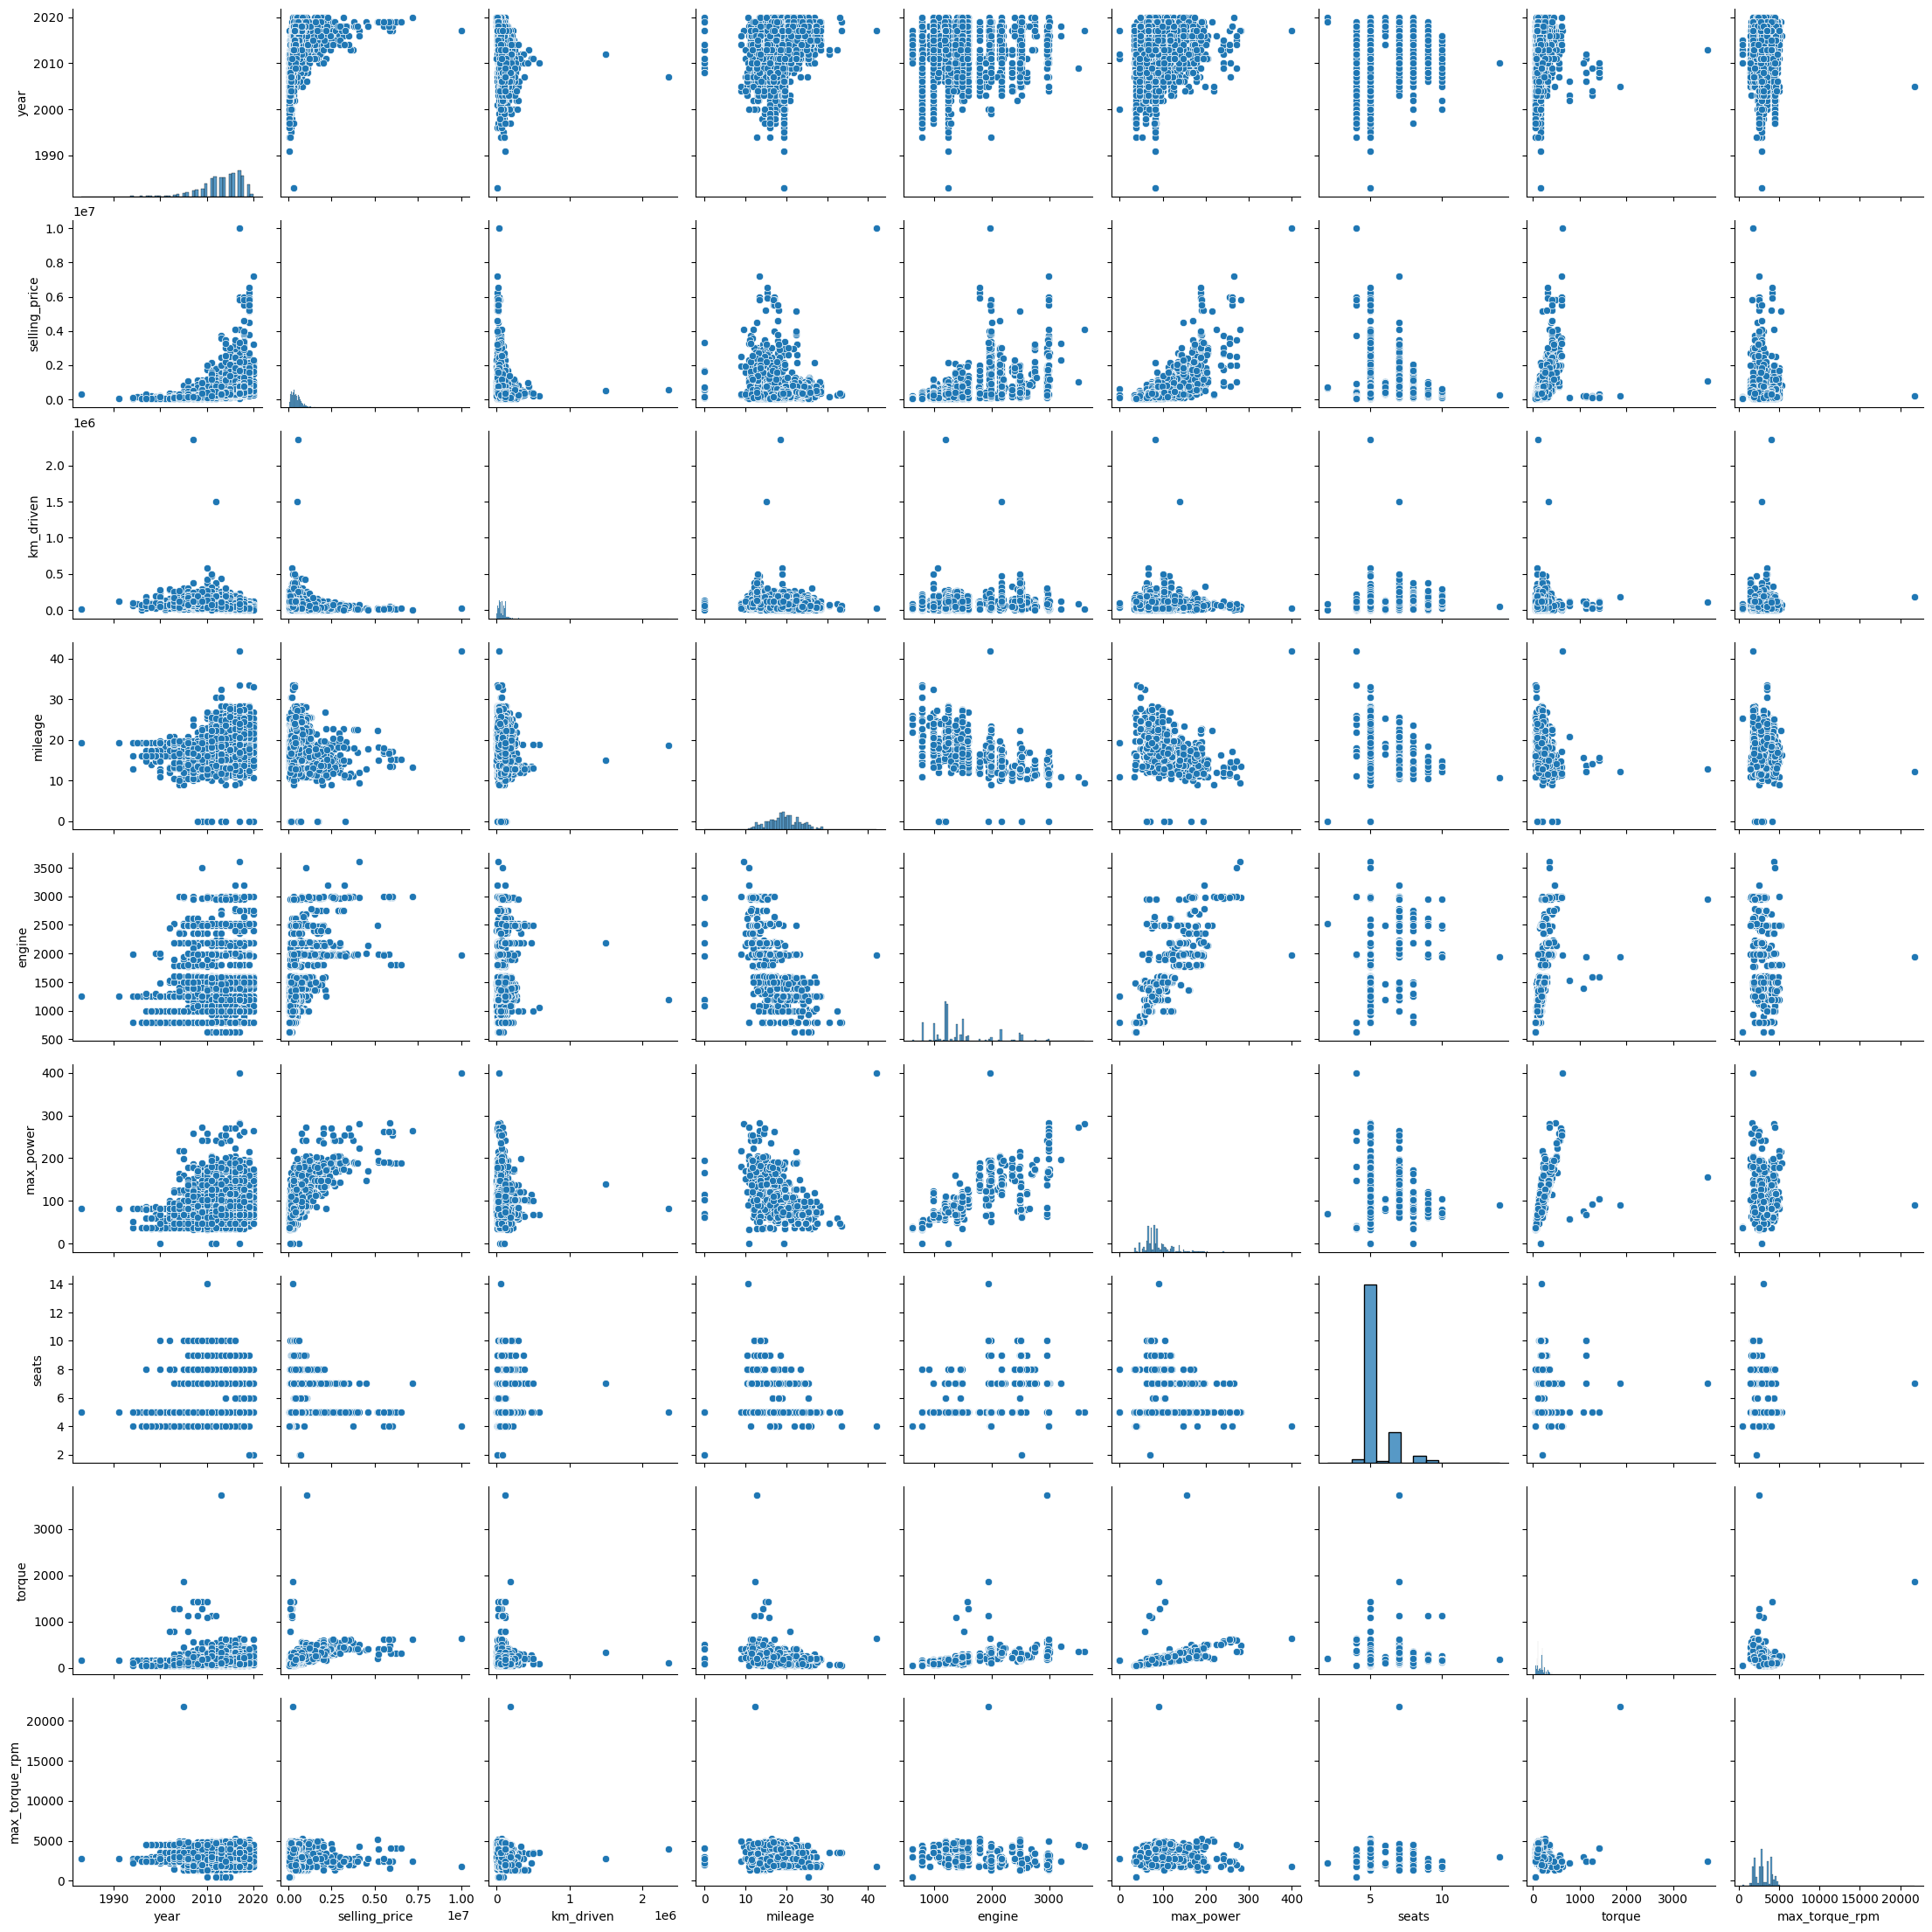

test


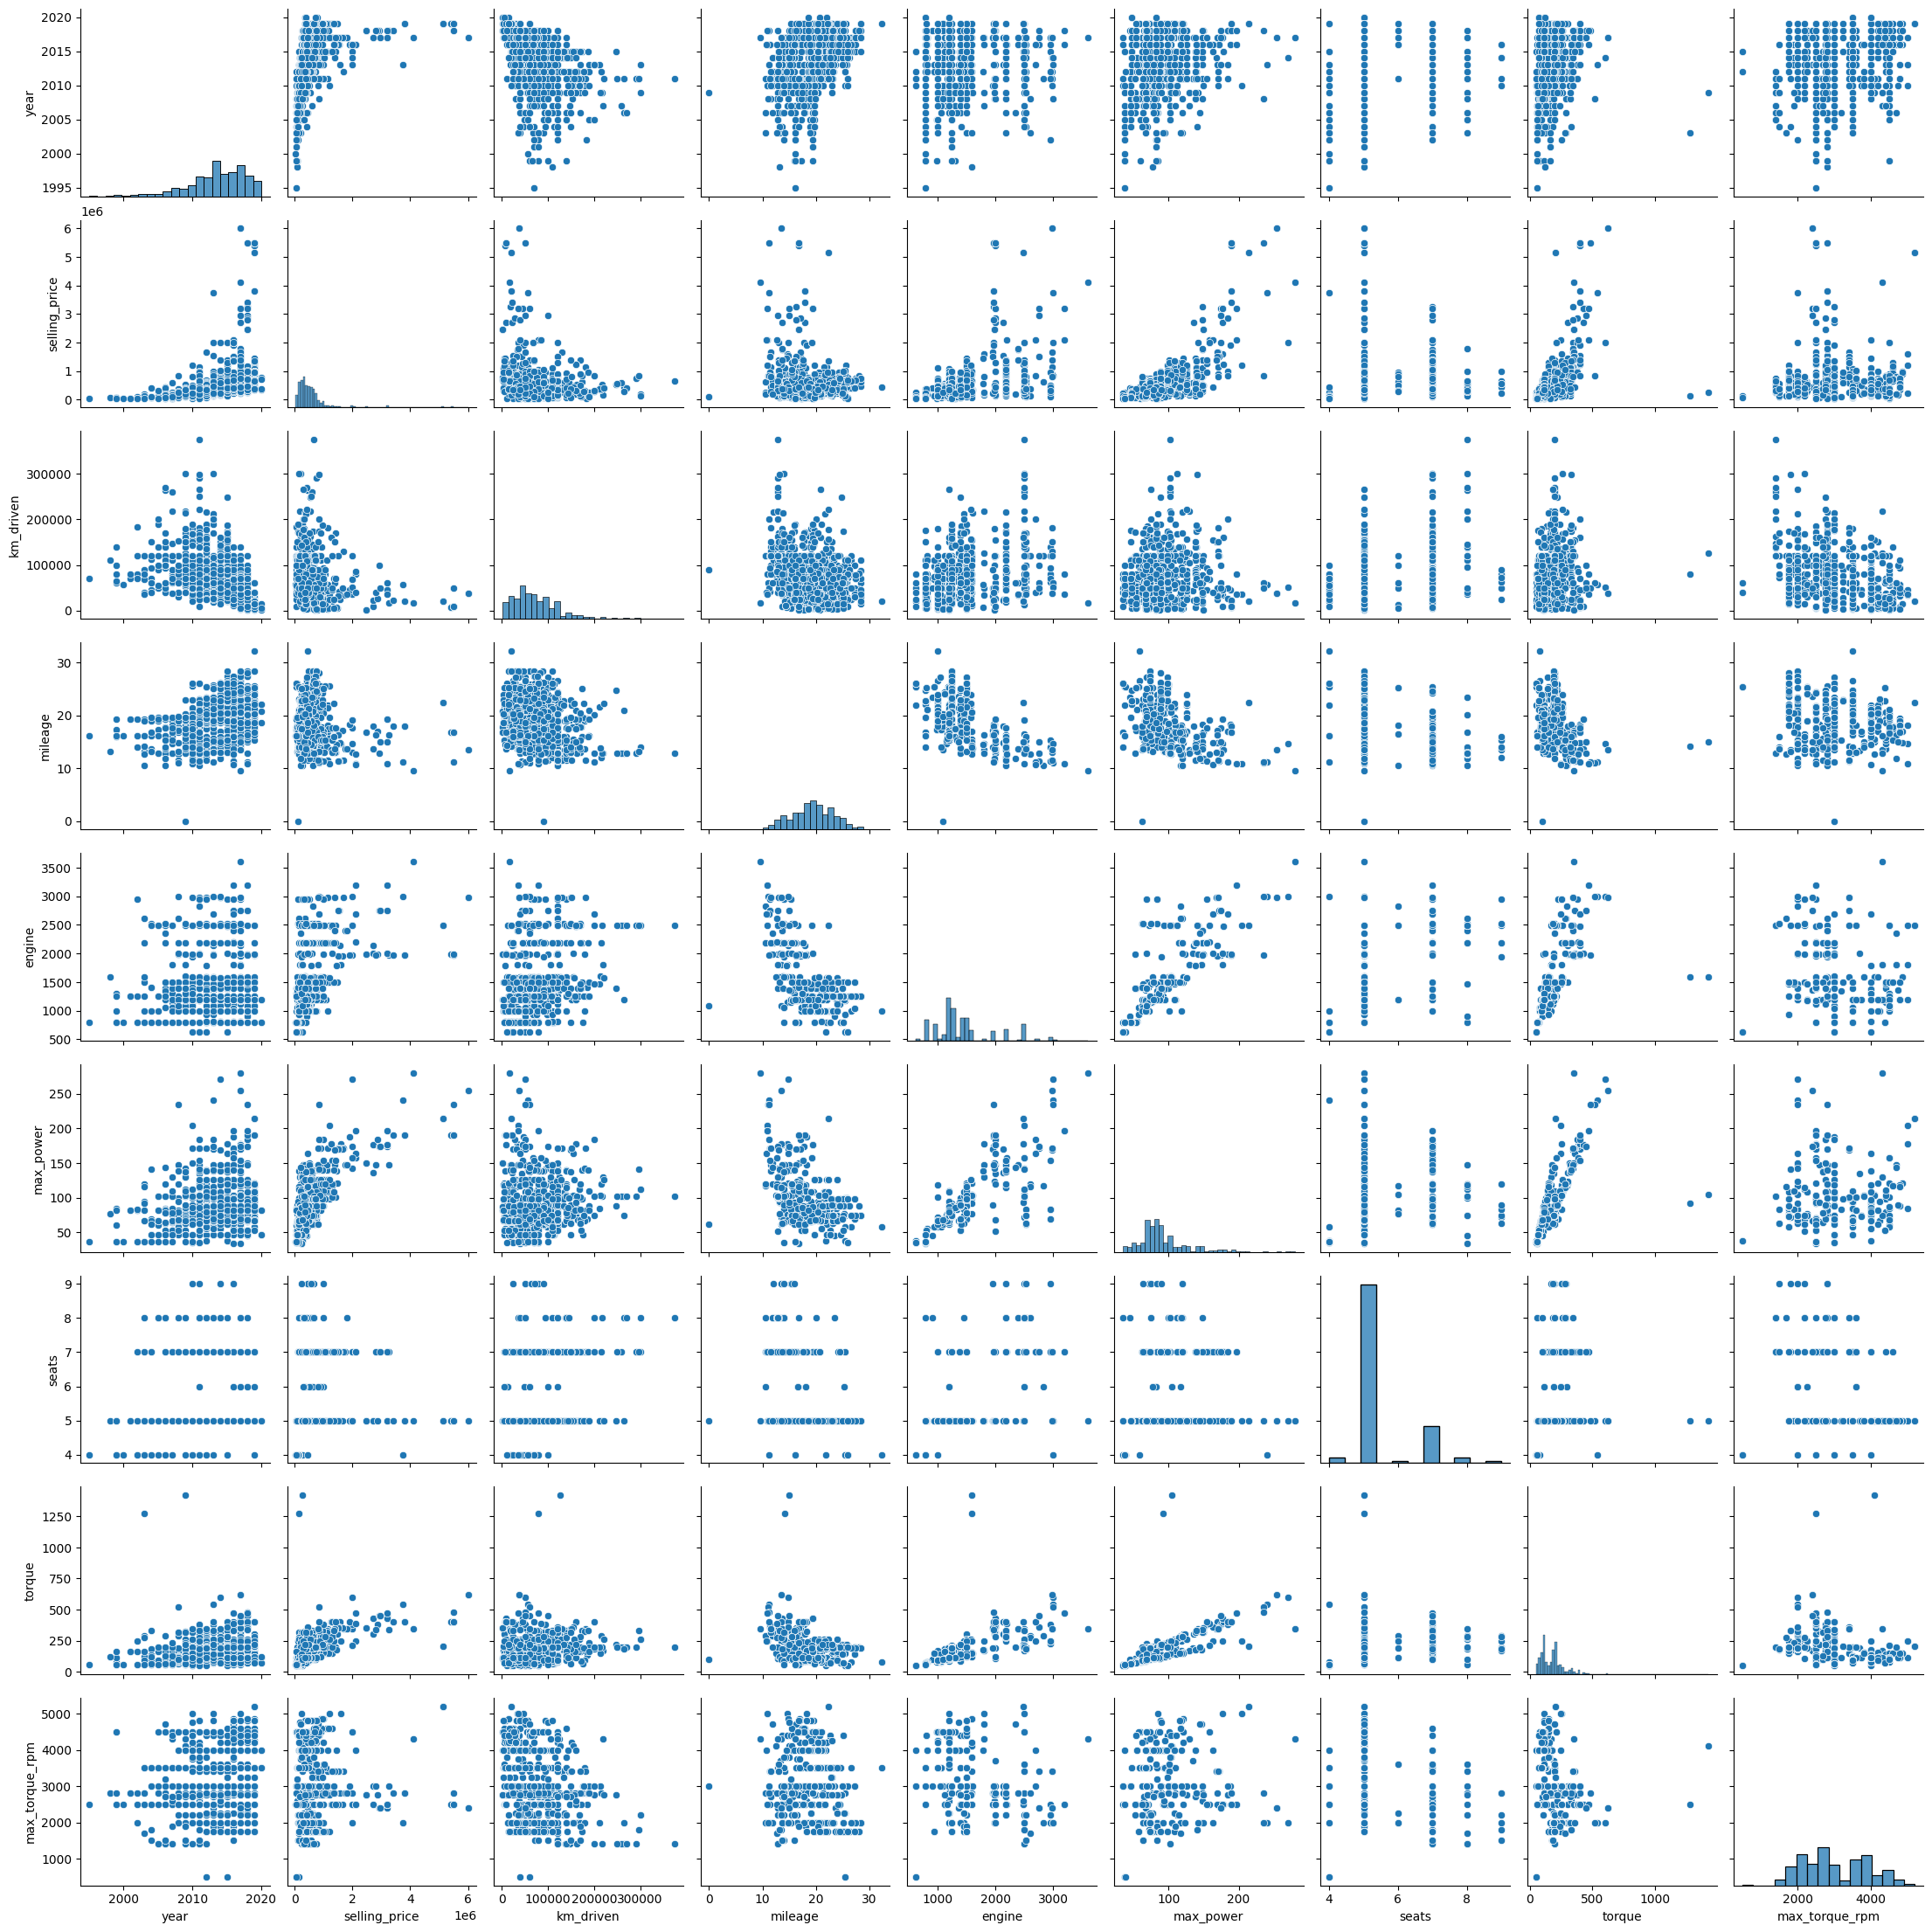

In [118]:
print("train")
sns.pairplot(df_train)
plt.show()

print("test")
sns.pairplot(df_test)
plt.show()

# **Шаг 1.**
***Можно ли предположить на основе распределений связь признаков с целевой переменной?***

Есть явная сильная связь selling_price с max_power и torque

***Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?***

Можно.

В scatter plot на сильную корреляцию признаков указывает кучность точек и закономерное расположение (линия, кривая, кластер)

В гистограммах на сильную корреляцию указывает нормальное распределение

# **Шаг 2.**
**Похожими ли оказались совокупности при разделении на трейн и тест?**

Похожи, но в train встречаются часто встречаются аномалии. При стандартном форматировании pairplot другие граничные значения на осях визуально меняют графическое представление данных.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

                    year  selling_price  km_driven   mileage    engine  max_power     seats    torque  max_torque_rpm
year            1.000000       0.427279  -0.368966  0.341334  0.002819   0.158207  0.041178  0.048262        0.087850
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   0.692725  0.149953  0.433124       -0.079992
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   0.024379  0.192328  0.106602       -0.240034
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893  -0.372197 -0.451059 -0.226219       -0.141395
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   0.681247  0.652172  0.566066       -0.280032
max_power       0.158207       0.692725   0.024379 -0.372197  0.681247   1.000000  0.242791  0.615853       -0.028245
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   0.242791  1.000000  0.298097       -0.239829
torque          0.048262       0.433124   0.106602 -0.22

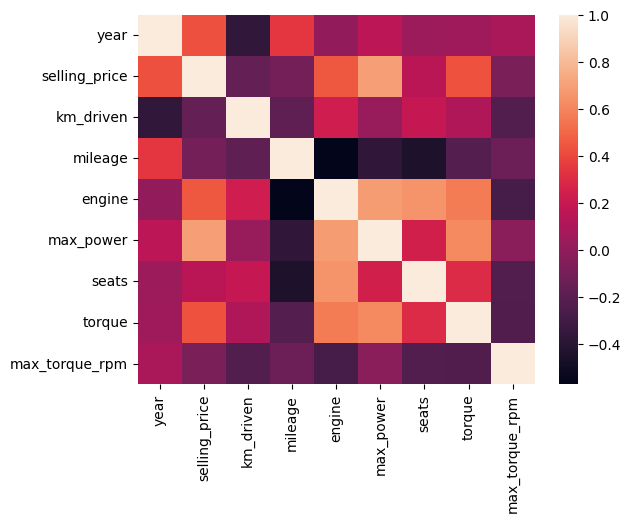

In [119]:
numeric_df = df_train.select_dtypes(include=[np.number])
correlations = numeric_df.corr()
print(correlations)
plt.figure()
sns.heatmap(correlations)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

**Какие 2 признака наименее скоррелированы между собой?**

year и engine

**Между какими наблюдается довольно сильная положительная линейная зависимость?**

max_power - selling_price

engine - max_power

engine - seats

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

Да. Корреляция year и km_driven = -0.368966

**Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?**

Rоэффициент корреляции Пирсона - линейная корреляция


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [120]:
from phik import phik_matrix

def my_spearman(array1, array2):
    def get_ranks(arr):
        #сортировка+индексы
        sorted_indices = np.argsort(arr)

        #массив рангов
        ranks = np.zeros_like(arr)
        current_rank = 0

        i = 0
        while i < len(arr):
            j = i
            while j < len(arr) and arr[sorted_indices[j]] == arr[sorted_indices[i]]:
                j += 1

            #средний ранг для одинаковых
            avg_rank = (current_rank + current_rank + (j - i) - 1) / 2.0
            for k in range(i, j):
                ranks[sorted_indices[k]] = avg_rank + 1  # +1 т.к. ранги с 1

            current_rank += (j - i)
            i = j
        return ranks

    array1_ranks = get_ranks(array1)
    array2_ranks = get_ranks(array2)

    return np.corrcoef(array1_ranks, array2_ranks)[0, 1]

columns = numeric_df.columns
n = len(columns)
our_spearman_matrix = np.zeros((n, n))
for i in range(len(numeric_df.columns)):
    for j in range(len(numeric_df.columns)):
        our_spearman_matrix[i, j] = my_spearman(numeric_df[columns[i]].values, numeric_df[columns[j]].values)

our_spearman_df = pd.DataFrame(our_spearman_matrix, index=columns, columns=columns)

print("Ручная")
print(our_spearman_df.round(2))
print()

lib_spearman_df = numeric_df.corr(method='spearman')
print("Библиотечная")
print(lib_spearman_df.round(2))
print()

diff_matrix = our_spearman_df - lib_spearman_df
print("Разности")
print(diff_matrix.round(10))
print()


print("Корреляция Пирсона")
print(correlations.round(2))
print()

print("Разности Спирмен - Пирсон")
difference = lib_spearman_df - correlations
print(difference.round(2))
print()


phik_matrix = numeric_df.phik_matrix()

print("phik")
print(phik_matrix.round(2))

print("Разности phik - Пирсон")
difference = phik_matrix - correlations
print(difference.round(2))
print()
print("Разности phik - Спирмен")
difference = phik_matrix - lib_spearman_df
print(difference.round(2))
print()



Ручная
                year  selling_price  km_driven  mileage  engine  max_power  seats  torque  max_torque_rpm
year            1.00           0.71      -0.57     0.35   -0.04       0.17   0.05    0.10            0.12
selling_price   0.71           1.00      -0.30     0.03    0.46       0.61   0.32    0.58           -0.12
km_driven      -0.57          -0.30       1.00    -0.20    0.30       0.04   0.20    0.24           -0.35
mileage         0.35           0.03      -0.20     1.00   -0.43      -0.31  -0.44   -0.16           -0.14
engine         -0.04           0.46       0.30    -0.43    1.00       0.71   0.53    0.84           -0.39
max_power       0.17           0.61       0.04    -0.31    0.71       1.00   0.30    0.78           -0.05
seats           0.05           0.32       0.20    -0.44    0.53       0.30   1.00    0.44           -0.23
torque          0.10           0.58       0.24    -0.16    0.84       0.78   0.44    1.00           -0.53
max_torque_rpm  0.12          -0.12    

# **Вывод по сравнению корреляции Спирмена и Пирсона**

Корреляция Спирмена может указать на нелинейный зависимости.
Корреляция Спирмена указывает на более сильную нелинейную связь между:

year - selling_price

mileage - selling_price

torque - max_torque_rpm

# **Вывод по анализу корреляции PHIK**

Имеется сильная нелинейная связь mileage с множеством других признаков, которой не было обнаружено при анализе корреляций Спирмена и Пирсона (включая связь с тагетным признаком):

selling_price

engine

max_power

seats

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

1. Построить гистограммы распределения целевой переменной по категориальным признакам

Обоснование - гистограммы по категориальным признакам показывают:

Форму распределения таргета в каждой категории

Асимметрию распределений

Перекрытие распределений разных категорий

2. Построить ящик с усами целевой переменной по категориальным признакам

Показывают:

Статистически значимые различия в медианных ценах между группами

Разброс цен внутри каждой категории

Наличие выбросов в конкретных категориях (премиум-сегмент или аномалии)

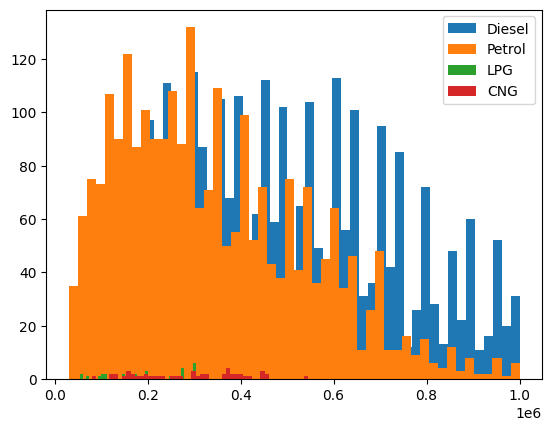

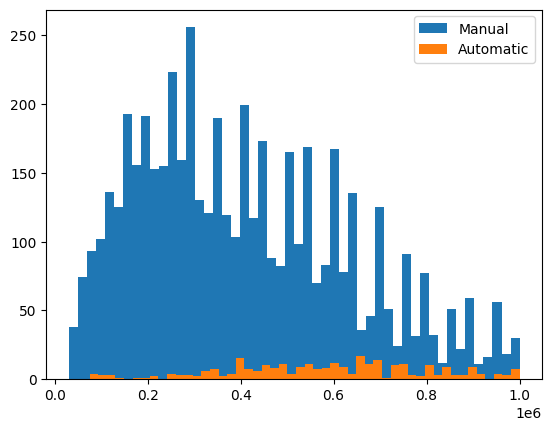

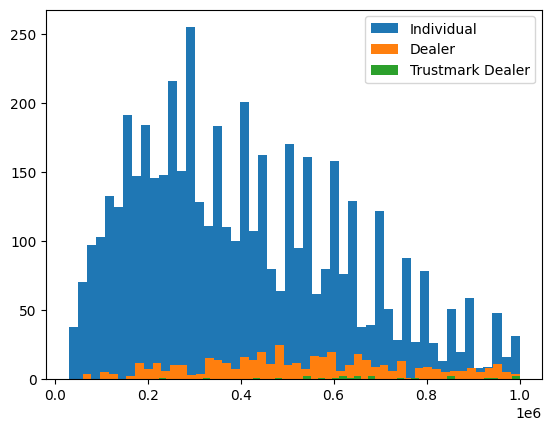

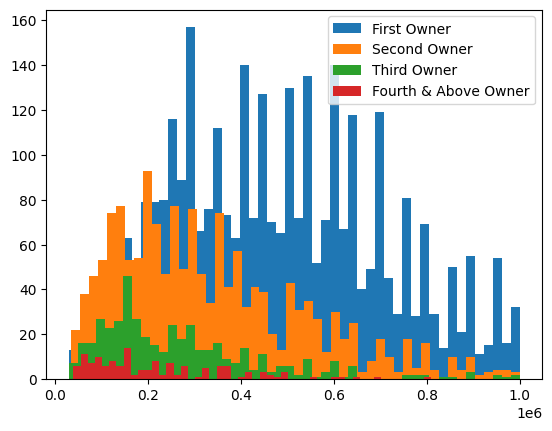

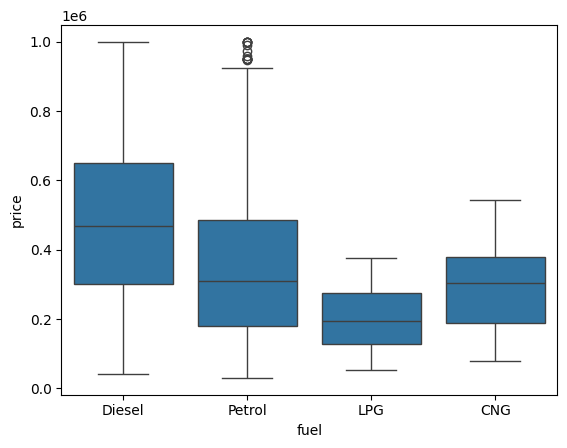

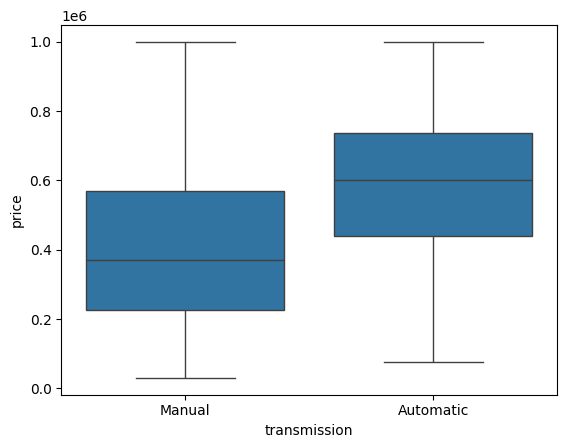

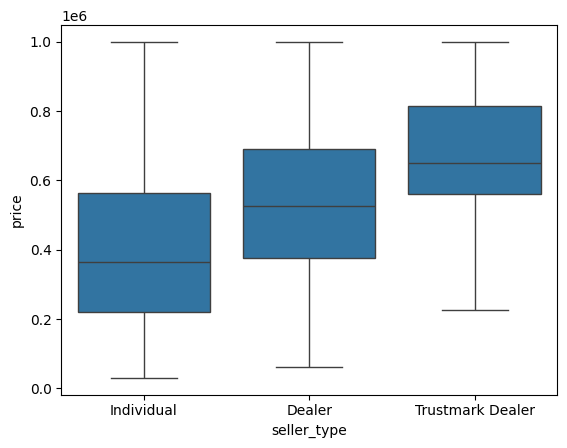

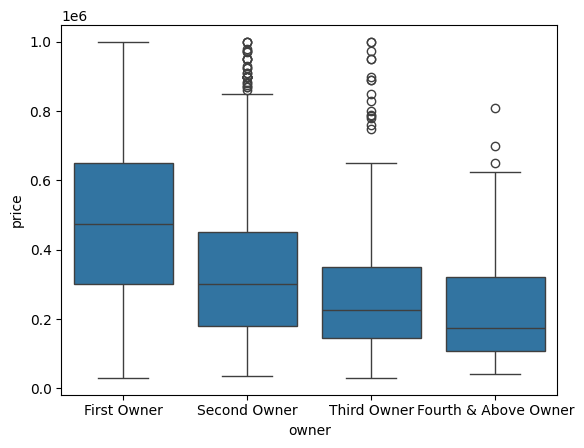

In [121]:
#ограничение в 1 млн для наглядности визуализации
price_limit = 1000000
filtered_df = df_train[df_train['selling_price'] <= price_limit]

#тип топлива
plt.figure()
for fuel_type in filtered_df['fuel'].unique():
    subset = filtered_df[filtered_df['fuel'] == fuel_type]
    plt.hist(subset['selling_price'], bins=50, label=fuel_type)
plt.legend()
plt.show()

#трансимиссия
plt.figure()
for transmission_type in filtered_df['transmission'].unique():
    subset = filtered_df[filtered_df['transmission'] == transmission_type]
    plt.hist(subset['selling_price'], bins=50, label=transmission_type)
plt.legend()
plt.show()

#продавец
plt.figure()
for seller_type in filtered_df['seller_type'].unique():
    subset = filtered_df[filtered_df['seller_type'] == seller_type]
    plt.hist(subset['selling_price'], bins=50, label=seller_type)
plt.legend()
plt.show()

#владелец
plt.figure()
for owner_type in filtered_df['owner'].unique():
    subset = filtered_df[filtered_df['owner'] == owner_type]
    plt.hist(subset['selling_price'], bins=50, label=owner_type)
plt.legend()
plt.show()

# Ящики с усами для цены по категориальным переменным
for feature in ['fuel', 'transmission', 'seller_type', 'owner']:
    plt.figure()
    sns.boxplot(data=filtered_df, x=feature, y='selling_price')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [122]:
numeric_features_df = df_train.select_dtypes(include=[np.number]).copy()


y_train = numeric_features_df['selling_price']
X_train = numeric_features_df.drop(['selling_price', 'seats'], axis=1)

In [123]:
X_train

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000000,2000.0
1,2014,120000,21.14,1498,103.52,250.000000,2500.0
2,2010,127000,23.00,1396,90.00,219.668960,2750.0
3,2007,120000,16.10,1298,88.20,112.776475,4500.0
4,2017,45000,20.14,1197,81.86,113.750000,4000.0
...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0
5836,2013,50000,18.90,998,67.10,90.000000,3500.0
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0
5838,2007,119000,16.80,1493,110.00,235.359600,1900.0


In [124]:
numeric_features_df_test = df_test.select_dtypes(include=[np.number]).copy()

y_test = numeric_features_df_test['selling_price']
X_test = numeric_features_df_test.drop(['selling_price', 'seats'], axis=1)

In [125]:
X_test

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,2010,168000,14.00,2498,112.00,260.00000,2200.0
1,2017,25000,21.50,1497,108.50,260.00000,2750.0
2,2007,218463,12.90,1799,130.00,172.00000,4300.0
3,2015,173000,25.10,1498,98.60,200.00000,1750.0
4,2011,70000,16.50,1172,65.00,96.00000,3000.0
...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04000,4500.0
996,2017,50000,18.60,1197,81.83,114.70000,4000.0
997,2009,40000,23.00,1396,90.00,219.66896,2750.0
998,2012,25000,20.36,1197,78.90,111.80000,4000.0


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [126]:
def print_results (name, *metrics):
    print(f"Качество на {name}")
    for metric in metrics:
        print(f"Метрика - {var_name(metric).split('_', 1)[1]}. Значение: {metric:.2f}")

#функция var_name написана Deepseek
def var_name(var):
    import inspect
    frame = inspect.currentframe()
    while frame.f_code.co_name != 'calculate_and_print_metrics':
        frame = frame.f_back
    return next(name for name, value in frame.f_locals.items() if value is var)

def calculate_and_print_metrics (train_pred, test_pred, train_fact=y_train, test_fact=y_test):
    train_r2 = r2_score(train_fact, train_pred)
    train_mse = MSE(train_fact, train_pred)
    test_r2 = r2_score(test_fact, test_pred)
    test_mse = MSE(test_fact, test_pred)
    print_results('train', train_r2, train_mse)
    print_results('test', test_r2, test_mse)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr_model = lr_model.predict(X_train)
y_test_pred_lr_model = lr_model.predict(X_test)
calculate_and_print_metrics (y_train_pred_lr_model, y_test_pred_lr_model)

Качество на train
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 114843044049.69
Качество на test
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 232025335289.15


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [128]:
def my_r2(fact_arr, predicted_arr):
    mean_fact = np.mean(fact_arr)
    ssr = np.sum((fact_arr-predicted_arr)**2)
    sst = np.sum((fact_arr-mean_fact)**2)
    return 1 - (ssr / sst)
my_r2 (y_train, y_train_pred_lr_model)

np.float64(0.599345137473213)

# **Объясните каждую компоненту метрики**

sst - Общая сумма квадратов - описывает общую дисперсия целевой переменной

ssr - Сумма квадратов ошибок - описывает на сколько модель ошибается

ssr / sst - доля дисперсии, которая не описывается моделью

1 - (ssr / sst) - доля дисперсии, которая описывается моделью

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [129]:
def my_r2_adjusted(x, fact_arr, predicted_arr):
    #Расчет R2
    mean_fact = np.mean(fact_arr)
    ssr = np.sum((fact_arr-predicted_arr)**2)
    sst = np.sum((fact_arr-mean_fact)**2)
    r2 = 1 - (ssr / sst)

    p = x.shape[1]#кол-во признаков
    n = len(fact_arr)#кол-во записей
    return 1-((1-r2)*(n-1))/(n-p-1)
my_r2_adjusted (X_train, y_train, y_train_pred_lr_model)

np.float64(0.5988642417191514)

***Объясните, когда применяется  adjusted−R2 ?***
1. При сравнении моделей с разным количеством признаков
2. При отборе признаков
3. При большом количестве признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

y_train_pred_lr_sc = lr_model_scaled.predict(X_train_scaled)
y_test_pred_lr_sc = lr_model_scaled.predict(X_test_scaled)

calculate_and_print_metrics (y_train_pred_lr_sc, y_test_pred_lr_sc)

Качество на train
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 114843044049.69
Качество на test
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 232025335289.15


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [132]:
feature_importance = pd.DataFrame({'feature': X_train.columns,'coefficient': lr_model_scaled.coef_})
print(f"Intercept - {lr_model_scaled.intercept_}")
print(feature_importance.to_string(index=False))

Intercept - 522960.09109588666
       feature   coefficient
          year 161071.491836
     km_driven -51571.630859
       mileage  -2050.533501
        engine  -3850.448011
     max_power 343731.818669
        torque   5016.483591
max_torque_rpm -59788.124208


Наиболее информативный признак - max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [133]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

calculate_and_print_metrics (y_train_pred_lasso, y_test_pred_lasso)

print("Коэффициенты:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Качество на train
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 114843044075.87
Качество на test
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 232025959314.71
Коэффициенты: [161068.76040667 -51571.2772878   -2044.612751    -3842.0796093
 343728.71953647   5015.09005747 -59784.04718272]
Intercept: 522960.09109588666


# **Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.**
Не занулила.

Все признаки имеют связь с целевой переменной

Данные информативны

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [134]:
from sklearn.model_selection import GridSearchCV

lasso_grid_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'selection': ['cyclic', 'random'],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_grid_params,
    cv=10,
    scoring='r2'
)
grid_search.fit(X_train_scaled, y_train)
print("Параметры - ", grid_search.best_params_)
print("r2 - ", grid_search.best_score_)

n_models = len([0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]) * \
           len(['cyclic', 'random']) * \
           len([1e-4, 1e-3, 1e-2]) * \
           10  #cv

print(f"Обущено моделей {n_models}")

best_lasso = grid_search.best_estimator_
print(f"Коэффициенты: {best_lasso.coef_}")


#предсказания по лучшей модели
y_train_pred_lasso_optimised = best_lasso.predict(X_train_scaled)
y_test_pred_lasso_optimised = best_lasso.predict(X_test_scaled)

calculate_and_print_metrics (y_train_pred_lasso_optimised, y_test_pred_lasso_optimised)

Параметры -  {'alpha': 10.0, 'selection': 'random', 'tol': 0.001}
r2 -  0.5723248638222176
Обущено моделей 540
Коэффициенты: [161043.48972834 -51568.39882262  -1990.00263239  -3764.51104673
 343699.92339585   5002.34580266 -59746.56430227]
Качество на train
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 114843046787.51
Качество на test
Метрика - r2. Значение: 0.60
Метрика - mse. Значение: 232031663204.21


**Сколько грид-сёрчу пришлось обучать моделей?**

540

**Что значит каждый параметр param_grid, который вы заполняли для GridSearch?**

alpha - сила L1-регуляризации (0.0001-10.0)

selection - алгоритм отбора признаков

'cyclic' - последовательный перебор

'random' - случайный выбор (может быть быстрее)

tol - точность оптимизации (0.0001-0.01)


**Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?**

r2 = 0.572

Ни один из весов не занулился

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [135]:
from sklearn.linear_model import ElasticNet

elasticnet_grid_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
}

elasticnet = ElasticNet(random_state=42)
grid_search_en = GridSearchCV(
    estimator=elasticnet,
    param_grid=elasticnet_grid_params,
    cv=10,
    scoring='r2',
)

grid_search_en.fit(X_train_scaled, y_train)

print("Лучшие параметры", grid_search_en.best_params_)
print("r2", grid_search_en.best_score_)

n_models = len([0.001, 0.01, 0.1, 1.0, 10.0]) * \
           len([0.1, 0.3, 0.5, 0.7, 0.9]) * \
           10  #cv

print(f"Обучено моделей {n_models}")

#предсказания по лучшей модели
best_elasticnet = grid_search_en.best_estimator_
y_train_pred_elasticnet = best_elasticnet.predict(X_train_scaled)
y_test_pred_elasticnet = best_elasticnet.predict(X_test_scaled)

calculate_and_print_metrics (y_train_pred_elasticnet, y_test_pred_elasticnet)

Лучшие параметры {'alpha': 1.0, 'l1_ratio': 0.9}
r2 0.5780868662655346
Обучено моделей 250
Качество на train
Метрика - r2. Значение: 0.59
Метрика - mse. Значение: 116627042125.51
Качество на test
Метрика - r2. Значение: 0.57
Метрика - mse. Значение: 246354170363.26


**Сколько грид-сёрчу пришлось обучать моделей?**

250

**Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?**

alpha = 1, l1_ratio = 0.9

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [136]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [137]:
numeric_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
categorical_columns = df_train.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
model_features = categorical_columns + X_train.columns.tolist()
df_train['name'] = df_train['name'].str.split().str[0]#оставляем только марку машины
df_test['name'] = df_test['name'].str.split().str[0]#оставляем только марку машины
cat_df_train = pd.concat([df_train[categorical_columns + ['selling_price']].copy(), pd.DataFrame(X_train_scaled, columns=numeric_columns, index=df_train.index)], axis=1)
cat_df_test = pd.concat([df_test[categorical_columns + ['selling_price']].copy(), pd.DataFrame(X_test_scaled, columns=numeric_columns, index=df_test.index)], axis=1)
X_train_cat = cat_df_train.drop('selling_price', axis=1)
y_train_cat = cat_df_train['selling_price']
X_test_cat = cat_df_test.drop('selling_price', axis=1)
y_test_cat = cat_df_test['selling_price']

In [138]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [139]:
model_features.append('seats')
categorical_columns.append('seats')
cat_df_train = pd.concat([df_train[categorical_columns + ['selling_price']].copy(), pd.DataFrame(X_train_scaled, columns=numeric_columns, index=df_train.index)], axis=1)
cat_df_test = pd.concat([df_test[categorical_columns + ['selling_price']].copy(), pd.DataFrame(X_test_scaled, columns=numeric_columns, index=df_test.index)], axis=1)
X_train_cat = cat_df_train.drop('selling_price', axis=1)
y_train_cat = cat_df_train['selling_price']
X_test_cat = cat_df_test.drop('selling_price', axis=1)
y_test_cat = cat_df_test['selling_price']

In [140]:
print("categorical_columns:", categorical_columns)
print("X_train columns:", X_train.columns.tolist())

categorical_columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
X_train columns: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']


In [141]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder.fit(X_train_cat[categorical_columns])
#df с только категориальными признакам, прошедшими OHE
X_train_encoded_catonly = encoder.transform(X_train_cat[categorical_columns])
X_test_encoded_catonly = encoder.transform(X_test_cat[categorical_columns])
#объединение df с количественными признаками
X_train_encoded = pd.concat([X_train_cat[numeric_columns],pd.DataFrame(X_train_encoded_catonly, columns=encoder.get_feature_names_out(),index=X_train_cat.index)], axis=1)
X_test_encoded = pd.concat([X_test_cat[numeric_columns],pd.DataFrame(X_test_encoded_catonly, columns=encoder.get_feature_names_out(),index=X_test_cat.index)], axis=1)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [142]:
# Проверка новых категорий
for i, col in enumerate(categorical_columns):
    train_categories = set(encoder.categories_[i])
    test_categories = set(X_test_cat[col].unique())
    new_categories = test_categories - train_categories
    if new_categories:
        print(f"Колонка '{col}': {len(new_categories)} новых категорий -> {list(new_categories)[:3]}")  # показываем первые 3
    else:
        print(f"Колонка '{col}': новых категорий нет")

Колонка 'name': 2 новых категорий -> ['Ashok', 'Opel']
Колонка 'fuel': новых категорий нет
Колонка 'seller_type': новых категорий нет
Колонка 'transmission': новых категорий нет
Колонка 'owner': новых категорий нет
Колонка 'seats': новых категорий нет


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

**Как корректно работать с OHE преобразованием?**

Обучать энкодер только на тренировочных данных

Применять drop='first' для избежания мультиколлинеарности, если используем intercept в модели

**Почему мы удаляем один столбец?**

Для избежания мультиколлинеарности. Полный OHE создает линейно зависимые признаки, где сумма всех столбцов = 1. Это вызывает мультиколлинеарность, если в модели используется intercept
Удаление одного столбца решает эту проблему, особенно важно для линейных моделей.


**Пусть из $n$$n$ признаков мы получили $n-1$$n-1$ столбец, из которых $k < n -1$$k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?**

Нет. Удаление части столбцов:

Нарушает структуру категории

Меняет интерпретацию оставшихся признаков


### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [143]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
ridge_grid.fit(X_train_encoded, y_train_cat)

best_ridge = ridge_grid.best_estimator_
print(f"Лучший alpha: {ridge_grid.best_params_['alpha']}")
print(f"Лучший r2: {ridge_grid.best_score_:.2f}")

#предсказания по лучшей модели
y_train_pred_ridge = best_ridge.predict(X_train_encoded)
y_test_pred_ridge = best_ridge.predict(X_test_encoded)

calculate_and_print_metrics (y_train_pred_ridge, y_test_pred_ridge)




print("Intercept:", best_ridge.intercept_)
feature_weights = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'weight': best_ridge.coef_
})
print(feature_weights.sort_values('weight', key=abs, ascending=False))


Лучший alpha: 1
Лучший r2: 0.71
Качество на train
Метрика - r2. Значение: 0.77
Метрика - mse. Значение: 65710705336.39
Качество на test
Метрика - r2. Значение: 0.78
Метрика - mse. Значение: 125622934636.98
Intercept: 1073676.8879529196
                         feature        weight
44          owner_Test Drive Car  2.516318e+06
35                    name_Volvo  1.624347e+06
22                    name_Lexus  1.512219e+06
8                       name_BMW  9.653220e+05
21                     name_Land  8.592431e+05
18                   name_Jaguar  6.146096e+05
26            name_Mercedes-Benz  5.786106e+05
32                     name_Tata -5.444897e+05
11                   name_Datsun -5.402079e+05
9                 name_Chevrolet -5.199687e+05
12                     name_Fiat -4.947661e+05
34               name_Volkswagen -4.931279e+05
30                  name_Renault -4.664105e+05
15                    name_Honda -4.568648e+05
31                    name_Skoda -4.549748e+05
24          

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [86]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [144]:
def business_metric(fact, model_predict):
    """
    fact - фактические значения таргета
    model_predict - модельные значения таргета
    """
    relative_error = np.abs((fact - model_predict) / fact) * 100
    return np.mean(relative_error <= 10)

In [145]:
results_df = pd.DataFrame(columns=['model_name', 'train_metric', 'test_metric'])
names, train_metric, test_metric = [], [], []
for model_name, model_train, model_test in zip(('LinearRegression', 'LinearRegression + StandardScaler', 'StandardScaler + Lasso (default)', 'StandardScaler + Lasso (optimised)', 'StandardScaler + ElasticNet (optimised)', 'StandardScaler + OHE + Ridge (optimised)'),
(y_train_pred_lr_model, y_train_pred_lr_sc, y_train_pred_lasso, y_train_pred_lasso_optimised, y_train_pred_elasticnet, y_train_pred_ridge),
(y_test_pred_lr_model, y_test_pred_lr_sc, y_test_pred_lasso, y_test_pred_lasso_optimised, y_test_pred_elasticnet, y_test_pred_ridge)):
    names.append(model_name)
    train_metric.append(business_metric(y_train, model_train))
    test_metric.append(business_metric(y_test, model_test))

df_result = pd.DataFrame({
    'model_name': names,
    'train_metric': train_metric,
    'test_metric': test_metric
})


In [146]:
df_result

,model_name,train_metric,test_metric
0,LinearRegression,0.229452,0.250
1,LinearRegression + StandardScaler,0.229452,0.250
2,StandardScaler + Lasso (default),0.229452,0.250
3,StandardScaler + Lasso (optimised),0.229452,0.250
4,StandardScaler + ElasticNet (optimised),0.239384,0.260
5,StandardScaler + OHE + Ridge (optimised),0.275514,0.311


***Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса***

Лучше всего задачу бизнеса решает последняя модель, в которой:

Выполнена нормализация количественных признаков

One hot encoding категориальных признаков

Использована линейная регрессия с L2-регуляризацией (Ridge model)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [147]:
def your_business_metrics(fact, model_predict, error_loss=5, error_excess=15):
    """
    fact - фактические значения таргета
    model_predict - модельные значения таргета
    error_loss - допустимое отклонение в процентах в меньшую сторону
    error_excess - допустимое отклонение в процентах в большую сторону
    """
    error = ((fact - model_predict) / fact) * 100

    quality = np.where(error > 0, np.abs(error) <= error_loss, np.abs(error) <= error_excess)
    return np.mean(quality)

In [148]:
results_df = pd.DataFrame(columns=['model_name', 'train_metric', 'test_metric'])
names, train_metric, test_metric = [], [], []
for model_name, model_train, model_test in zip(('LinearRegression', 'LinearRegression + StandardScaler', 'StandardScaler + Lasso (default)', 'StandardScaler + Lasso (optimised)', 'StandardScaler + ElasticNet (optimised)', 'StandardScaler + OHE + Ridge (optimised)'),
(y_train_pred_lr_model, y_train_pred_lr_sc, y_train_pred_lasso, y_train_pred_lasso_optimised, y_train_pred_elasticnet, y_train_pred_ridge),
(y_test_pred_lr_model, y_test_pred_lr_sc, y_test_pred_lasso, y_test_pred_lasso_optimised, y_test_pred_elasticnet, y_test_pred_ridge)):
    names.append(model_name)
    train_metric.append(your_business_metrics(y_train, model_train))
    test_metric.append(your_business_metrics(y_test, model_test))

df_result = pd.DataFrame({
    'model_name': names,
    'train_metric': train_metric,
    'test_metric': test_metric
})

In [149]:
df_result

,model_name,train_metric,test_metric
0,LinearRegression,0.220377,0.235
1,LinearRegression + StandardScaler,0.220377,0.235
2,StandardScaler + Lasso (default),0.220377,0.235
3,StandardScaler + Lasso (optimised),0.220377,0.235
4,StandardScaler + ElasticNet (optimised),0.221233,0.233
5,StandardScaler + OHE + Ridge (optimised),0.260103,0.269


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.


In [95]:
print("categorical_columns:", categorical_columns)
print("X_train columns:", X_train.columns.tolist())

categorical_columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
X_train columns: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']


In [97]:
best_ridge.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [151]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', encoder, categorical_features)
    ])

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_ridge)
])

with open('model_pipeline.pickle', 'wb') as f:
    pickle.dump(full_pipeline, f)